# MAJOR PROJECT

### IMPORTING REQUIRED PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

### READING CSV FILE AS DATAFRAME

In [2]:
df=pd.read_csv("digit_svm.csv")

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x=df.iloc[:,1:].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
y=df.iloc[:,0].values
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

### VISUALIZING DATA

C:\Users\system 2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

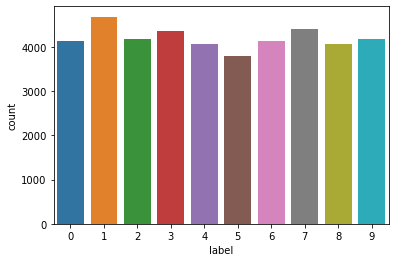

In [6]:
sns.countplot(df["label"])

### SPLITTING AND STANDARDISING DATA

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc=StandardScaler()

In [11]:
x_train=sc.fit_transform(x_train)

In [12]:
x_test=sc.fit_transform(x_test)

In [13]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### SUPPORT VECTOR CLASSIFICATION

In [12]:
from sklearn.svm import SVC

In [29]:
clf=SVC(kernel="rbf",random_state=42)

In [30]:
clf.fit(x_train,y_train)

SVC(random_state=42)

In [31]:
pred_y=clf.predict(x_test)

In [32]:
pred_y

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [14]:
y_test

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

### CONFUSION MATRIX AND ACCURACY

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [34]:
confusion_matrix(y_test,pred_y)

array([[792,   0,   5,   0,   2,   2,   7,   1,   4,   0],
       [  0, 941,  10,   2,   1,   0,   2,   2,   2,   1],
       [  4,   2, 834,   6,   3,   0,   2,   6,   3,   0],
       [  0,   3,  14, 810,   2,  11,   2,   8,  11,   2],
       [  1,   4,  11,   0, 788,   2,   4,   1,   2,  14],
       [  3,   1,   3,   8,   1, 728,   7,   0,   3,   2],
       [  2,   0,  14,   0,   1,   6, 816,   0,   2,   0],
       [  0,   4,  22,   1,   7,   0,   0, 853,   3,   9],
       [  2,   5,   6,   7,   3,  12,   7,   1, 723,   2],
       [  3,   2,   8,   7,   8,   2,   0,  18,   4, 760]], dtype=int64)

In [35]:
accuracy_score(y_test,pred_y)

0.9577380952380953

###### model is 95.5% efficient